In [3]:
import os
os.chdir("/content")
!rm -rf STAT-7220-Applied-Experimental-Design
print(os.getcwd())

/content


In [8]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "AuroraGalvan"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
       print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
      print(f"📥 Cloning repo from {repo_url}...")
      os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
else:
  print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
   print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/AuroraGalvan/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/AuroraGalvan/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** **Briefly define the objective of this experiment**
---The objective is to test if aging time has an effect on IBu levels of a new India Pale Ale.---

**Question 2.** **Specify the outcome variable**
---The outcome is the IBU levels (International Bitterness Units).---
**Question 3.** **Specify the independent variable. What are some possible lurking variables?**
----The Independet variables are 3 weeks,4 weeks,and 5 weeks (aging time).
Due to the test using a spectrophometer the potential lurking varibales could be temperature and light source. Those two varibales can mess/affect the reading/results. Making them a pontential varibale to consider additionally for a deeper look. ----
**Question 4.** **Briefly explain why a completely randomized design may be appropriate for this experiment.**
-----A CRD is the most appropiate because by randomley place the same IPA in the different tanks you are minizing the options of it being a bias test. They are randomley chosen minizimg any intruding with temperature, light, smudges (factors than can alter the results). The same IPA is being used for the test making it only fair to randmly grab one from each tank at the end to minize results bias. Making the results as authentic as possible. ----
**Question 5.** **State the null and alternative hypotheses for this experiment.**
----The Null Hypothesis is that the IBU levels are not affected by aging time(no correlation).
The Alternative Hypothesis is that the IBU levels is affected by the aging time.-----
**Question 6.** **Perform appropriate exploratory analysis, including summary statistics** **and** **data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?**
They support the null hypothesis more strongly than the alternativa hypothesis. The F-test, Wilk-Test fail to to reject the null hypothesis meaning either there is not sufficient data to make the alternative strong enough. Results show variance levels was low impact showing not a significant difference in aging times.


In [9]:
import pandas as pd

##Import the IPA Data##
ipa=pd.read_excel("IPA.xlsx")
##Data Integrity Check with .info##
ipa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weeks   30 non-null     object 
 1   IBU     30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


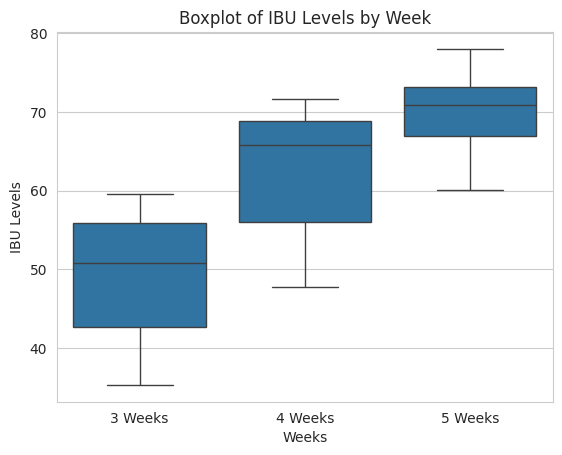

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Create boxplot using seaborn ##

sns.boxplot(x="Weeks",y="IBU",data=ipa)

## Add Title and Labels using matplotlib ##

plt.title("Boxplot of IBU Levels by Week", loc='center')
plt.xlabel("Weeks")
plt.ylabel("IBU Levels")
plt.show()

**Question 7. Build a one-way ANOVA model. Test the assumption of normality using both a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?**

**Question 8. Test the assumption of homogeneity of variance using both a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?** ---The results failed to reject the null hypothesis because homsedasticity was detected. Variance was constantly assumed. ---

**Question 9. Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why? **---According to the F-test the P value is muche greated than 0.05 so it fails to reject the null. The resdiuals are nomrally distributted. ----

**Question 10. If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.**----- The Turjey test is to be able to display and or take a deeper dive into the difference in means between all groups. COnsidering the data shows that ther eis not enough datta to support that aging time affects IBU, there won't be a big difference in the means or between the groups. -----

**Question 11. Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.** ----In conclusion the there is not sufficient evidents to support the alternative hypothesis. Therefore we fail to reject the null hypothesis. The null hypothesis supposrt that aging times and IBU has little correlation. I think some of the limitations would probably be not enough data. When performing the variance test adn anova the residuals are close in variance and results should little difference in levels. I think that if we has more datta as far as many more tanks with a bigger gap of time like one month. SO the the mean level of the IBU have a greater chance of showing a differenc ein between groups versus week to week the levels won't be as drastic. ----

            df      sum_sq      mean_sq          F    PR(>F)
C(Weeks)   2.0  2174.83994  1087.419970  19.339842  0.000006
Residual  27.0  1518.12718    56.226933        NaN       NaN


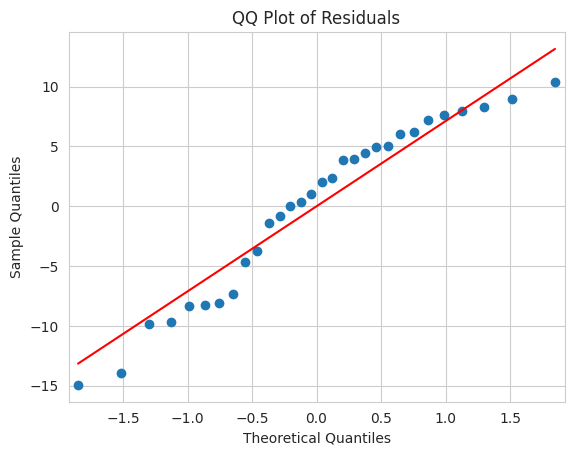

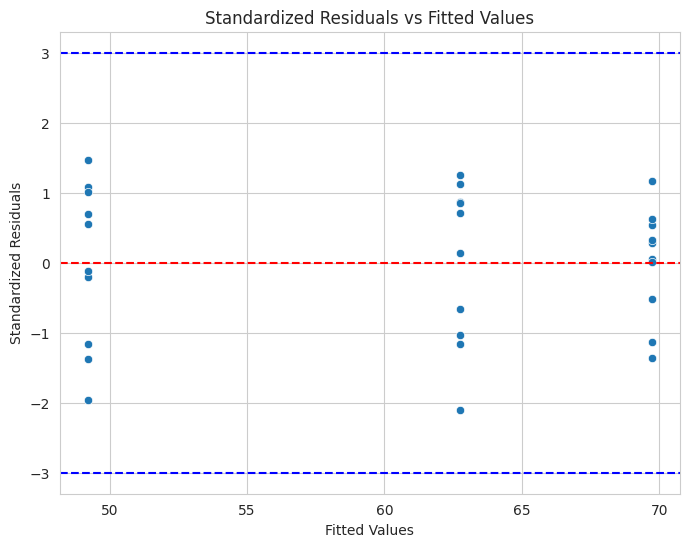

In [38]:
##Question 7 ##
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Fit One-Way ANOVA Model ##

ipa_mod = smf.ols('IBU ~ C(Weeks)', data=ipa).fit()

## Get the ANOVA table ##

aov_tab = sm.stats.anova_lm(mod,typ=1)

print(aov_tab)
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

import scipy.stats as stats

residuals = ipa_mod.resid



sm.qqplot(residuals, line ='s')
plt.title("QQ Plot of Residuals")
plt.show()
standardized_residuals = ipa_mod.get_influence().resid_studentized_internal


fitted_values = ipa_mod.fittedvalues

plt.figure(figsize=(8,6))
sns.scatterplot(x=fitted_values, y=standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(3, color='blue', linestyle='--')
plt.axhline(-3, color='blue', linestyle='--')
plt.title("Standardized Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")
plt.show()

In [41]:
## Question 8 ##
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(ipa_mod.resid,ipa_mod.model.exog)

f_statistic = bp_test[2]

f_p_value = bp_test[3]

print(f"BP Test F-statistic: {f_statistic}")
print(f"BP Test F p-value: {f_p_value}")
if f_p_value > 0.05:
    print("Fail to reject null hypothesis: Homoscedasticity detected. Constant Variance assumed.")
else:
    print("Reject null hypothesis: Heteroscedasticity detected. Constant Variance not assumed.")

sw_test = stats.shapiro(residuals)
## Extract Test Stat and P-Value ##
sw_stat = sw_test.statistic
sw_pvalue = sw_test.pvalue
## Print Results ##
print(f"Shapiro-Wilk Test Statistic: {sw_stat:.4f}")
print(f"Shapiro-Wilk Test P-Value: {sw_pvalue:.4f}")
if sw_pvalue > 0.05:
    print("Fail to reject null hypothesis: Residuals are normally distributed.")
else:
    print("Reject null hypothesis: Residuals are not normally distributed.")


BP Test F-statistic: 1.2952914537529732
BP Test F p-value: 0.2902941540365849
Fail to reject null hypothesis: Homoscedasticity detected. Constant Variance assumed.
Shapiro-Wilk Test Statistic: 0.9341
Shapiro-Wilk Test P-Value: 0.0630
Fail to reject null hypothesis: Residuals are normally distributed.
